# PRE-PROCESSING

In [1]:
%run "00-common"
%matplotlib inline

In [2]:
df = pd.read_csv('../kepler.csv')

In [3]:
df.describe(include='all')

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,9564.000000,9.564000e+03,9564,2294,9564,9564,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,9110.000000,9564.000000,9110.000000,9110.000000,9201.000000,9110.000000,9110.000000,9564.000000,9110.000000,9110.000000,9.201000e+03,9110.000000,9110.000000,9201.000000,9201.000000,9201.000000,9201.000000,0.0,0.0,9.243000e+03,9.243000e+03,9.243000e+03,9201.000000,9218.000000,9218,9201.000000,9096.000000,9081.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9096.000000,9564.000000,9564.000000,9563.000000
unique,NaN,NaN,9564,2294,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,K01598.03,Kepler-169 f,FALSE POSITIVE,FALSE POSITIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,q1_q17_dr25_tce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,1,5023,5068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4782.500000,7.690628e+06,NaN,NaN,NaN,NaN,0.480829,0.188206,0.231598,0.194898,0.120033,75.671358,0.002148,-0.002148,166.183251,0.009933,-0.009933,0.735105,1.959861,-0.332557,5.621606,0.339942,-0.339942,2.379134e+04,123.197563,-123.197563,102.891778,17.657684,-33.023314,1085.385828,NaN,NaN,7.745737e+03,3.750698e+03,-4.043522e+03,259.895001,1.243654,NaN,5706.823280,144.635554,-162.265059,4.310157,0.120738,-0.143161,1.728712,0.362292,-0.394806,292.060163,43.810433,14.264606
std,2761.033321,2.653459e+06,NaN,NaN,NaN,NaN,0.476928,0.390897,0.421875,0.396143,0.325018,1334.744046,0.008236,0.008236,67.918960,0.023097,0.023097,3.348832,9.421653,1.249828,6.471554,0.669823,0.669823,8.224268e+04,4112.615230,4112.615230,3077.639126,391.138501,1193.519910,856.351161,NaN,NaN,1.592047e+05,5.504421e+04,8.838831e+04,795.806615,0.664573,NaN,796.857947,47.052305,72.746348,0.432606,0.132837,0.085477,6.127185,0.930870,2.168213,4.766657,3.601243,1.385448
min,1.000000,7.574500e+05,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.172500,120.515914,0.000009,-0.569000,0.000000,0.000000,-59.320000,0.052000,0.000000,-20.200000,0.000000e+00,0.000000,-388600.000000,0.080000,0.000000,-77180.000000,25.000000,NaN,NaN,0.000000e+00,0.000000e+00,-5.600031e+06,0.000000,1.000000,NaN,2661.000000,0.000000,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,2391.750000,5.556034e+06,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,-0.000276,132.761718,0.001240,-0.010500,0.197000,0.040000,-0.445000,2.437750,0.050800,-0.350000,1.599000e+02,9.600000,-49.500000,1.400000,0.230000,-1.940000,539.000000,NaN,NaN,2.015000e+01,9.190000e+00,-2.873100e+02,12.000000,1.000000,NaN,5310.000000,106.000000,-198.000000,4.218000,0.042000,-0.196000,0.829000,0.129000,-0.250000,288.660770,40.777173,13.440000
50%,4782.500000,7.906892e+06,NaN,NaN,NaN,NaN,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,-0.000035,137.224595,0.004130,-0.004130,0.537000,0.193000,-0.207000,3.792600,0.142000,-0.142000,4.211000e+02,20.750000,-20.750000,

In [4]:
df.isnull().sum()

rowid                   0
kepid                   0
kepoi_name              0
kepler_name          7270
koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff   

# DATA TRANSFORMATION: Feature Removal

In [5]:
notActive = ['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_pdisposition', 'koi_teq_err1', 'koi_teq_err2', 'koi_tce_delivname', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec']
df = df.drop(notActive, axis=1)

# DATA TRANSFORMATION: Example removal

In [6]:
df = df.drop(df[df.koi_disposition == 'CANDIDATE'].index)

# DATA TRANSFORM: Value Transformation

In [7]:
df= df.replace({'koi_disposition': {'CONFIRMED': 1, 'FALSE POSITIVE': 0}})

# DATA TRANSFORMATION: Missing values imputation

In [8]:
df = df.fillna(df.mean())

# DATA TRANSFORMATION: Normalization

In [9]:
X_kepler = df.values[:, 1:]
y_kepler = df.values[:, 0]

df.head()

,koi_disposition,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,1,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,2.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,39.30,31.04,-10.49,76.3,1.0,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,891.96,668.95,-230.35,505.6,1.0,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,1,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,1.0,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [10]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_kepler)
X2 = scaler.transform(X_kepler)

for i in range(13):
    print('std:', X2[:, i].std(), 'min', X2[:, i].min(), 'max', X2[:, i].max())

std: 0.9999999999999999 min -0.48379368514605353 max 8.361951078054997
std: 1.0 min -0.2566379481954387 max 20.593171353945795
std: 1.0 min -20.593171353945795 max 0.2566379481954387
std: 0.9999999999999999 min -0.6758191875052232 max 19.920885335934717
std: 1.0 min -0.4235329311917715 max 26.646266330329194
std: 1.0 min -26.646266330329194 max 0.4235329311917715
std: 1.0 min -0.22179641091916275 max 27.839395010038434
std: 1.0 min -0.22130150392953485 max 8.879564891311466
std: 1.0 min -31.297422799575596 max 0.2736698000361578
std: 0.9999999999999999 min -0.8271776884501996 max 19.04953759740823
std: 0.9999999999999999 min -0.4959173952519112 max 30.933007109873795
std: 0.9999999999999999 min -30.933007109873795 max 0.4959173952519112
std: 1.0 min -0.3366854795736433 max 16.612313742485505


# FEATURE SELECTION: Ranking

In [21]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

n = len(df.columns[1:])
original = np.zeros(n)
for i in range(n):
    X_reduced = SelectKBest(mutual_info_classif, k=i+1).fit_transform(X2, y_kepler)
    cv = StratifiedKFold(n_splits=10)
    cv_scores = cross_val_score(KNeighborsClassifier(), X=X_reduced,y=y_kepler, cv=cv, scoring='accuracy', n_jobs=-1)  
    original[i] = np.mean(cv_scores)

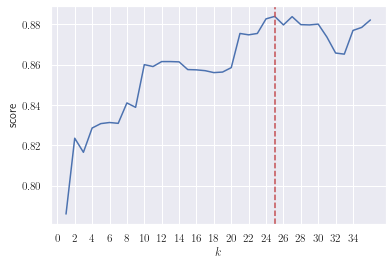

In [22]:
plt.xticks(np.arange(0, n, step=2), rotation=0)
plt.plot(range(1, n+1), original)
plt.xlabel('$k$')
plt.ylabel('score')
plt.axvline(x=25, color='r', linestyle='--')
plt.savefig('../figures/kbest.pdf')

In [23]:
selector = SelectKBest(mutual_info_classif, k=25)

X_reduced = selector.fit_transform(X2, y_kepler)

cols = selector.get_support(indices=True)
features_df_new = df.iloc[:, cols]

cv = StratifiedKFold(n_splits=10)
cv_scores = cross_val_score(KNeighborsClassifier(), X=X_reduced, y=y_kepler, cv=cv, scoring='accuracy', n_jobs=-1)  
np.mean(cv_scores)

0.8839664954811509

In [24]:
cols

array([ 0,  1,  2,  4,  5,  6, 10, 11, 12, 15, 16, 17, 18, 19, 20, 21, 22,
       24, 25, 26, 28, 29, 30, 31, 34])

In [25]:
scores = list(zip(df.columns[1:], selector.scores_))
scores = pd.DataFrame.from_records(scores, columns=['Variable', 'Score'])
scores.sort_values(by=['Score'], ascending=False)

,Variable,Score
25,koi_steff_err1,0.193758
15,koi_prad,0.184690
26,koi_steff_err2,0.170011
16,koi_prad_err1,0.164256
11,koi_duration_err2,0.156999
17,koi_prad_err2,0.154296
10,koi_duration_err1,0.153266
22,koi_model_snr,0.142149
31,koi_srad_err1,0.132922
4,koi_time0bk_err1,0.131132


In [26]:
keptCols = [df.columns[i+1] for i in cols]
keptCols.append('koi_disposition')

In [27]:
df_reduced = df[keptCols]
df_sampled = df_reduced.sample(2000, random_state=9685341)

Proportions are preserved

In [28]:
print(
    df_reduced.koi_disposition.value_counts()/df_reduced.shape[0], '\n',
    df_sampled.koi_disposition.value_counts()/df_sampled.shape[0])

0    0.686577
1    0.313423
Name: koi_disposition, dtype: float64 
 0    0.6805
1    0.3195
Name: koi_disposition, dtype: float64


In [29]:
df_sampled.to_csv('../feature_selection.csv', index=False)

Save tables

In [30]:
def texttt(s):
    s = s.replace('_', '\_')
    return "\\texttt{" + s + "}"
formatter = [texttt, None]

scores.sort_values(by=['Score'], ascending=False).head(25).to_latex('../tables/feature-score-25.tex', index=False, formatters=formatter, escape=False)
scores.sort_values(by=['Score'], ascending=False).to_latex('../tables/feature-score-all.tex', index=False, formatters=formatter, escape=False)